In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
def generate_synthetic_images():
    categories = ['palm', 'fist', 'thumbs_up']
    num_images = 100
    image_size = (64, 64)
    images = []
    labels = []

    for label, category in enumerate(categories):
        for _ in range(num_images):
            img = data.binary_blobs(length=64, blob_size_fraction=0.1, n_dim=2).astype(np.float32)
            img = transform.resize(img, image_size, mode='reflect')
            images.append(img)
            labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, categories


In [3]:
images, labels, categories = generate_synthetic_images()


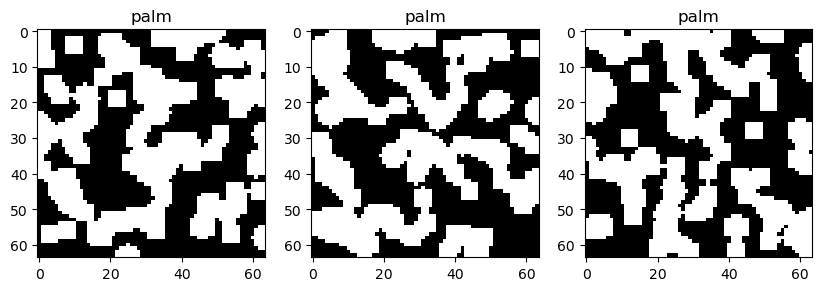

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
for ax, img, label in zip(axes, images[:3], labels[:3]):
    ax.imshow(img, cmap='gray')
    ax.set_title(categories[label])
plt.show()

In [5]:
n_samples, h, w = images.shape
X = images.reshape((n_samples, -1))
y = labels

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
svm_clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))


In [8]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

In [9]:
y_pred = svm_clf.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 31.67%


In [11]:
print(classification_report(y_test, y_pred, target_names=categories))

              precision    recall  f1-score   support

        palm       0.36      0.41      0.38        22
        fist       0.32      0.38      0.34        16
   thumbs_up       0.25      0.18      0.21        22

    accuracy                           0.32        60
   macro avg       0.31      0.32      0.31        60
weighted avg       0.31      0.32      0.31        60

